# **Adda Boost**

**Synthetic**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from sklearn.datasets import make_classification

In [31]:
X,y = make_classification(n_features=4,n_classes=2)

In [32]:
X_df= pd.DataFrame(X,columns=['feature_1','feature_2','feature_3','feature_4'])

In [33]:
print(X_df)

    feature_1  feature_2  feature_3  feature_4
0    2.379853   1.449543  -1.026529  -1.169788
1   -2.533504  -2.535706   1.894608   1.687970
2    0.418185  -0.449064   0.388130   0.108308
3    1.785078  -1.914457   1.654817   0.461241
4   -0.272619  -1.077024   0.853477   0.540268
..        ...        ...        ...        ...
95  -0.862002   1.539980  -1.296302  -0.497224
96   0.745126  -0.927856   0.794737   0.249938
97   0.311637   0.776731  -0.608532  -0.414927
98   0.512804   0.842014  -0.649061  -0.488279
99   1.390766  -1.231205   1.078959   0.243243

[100 rows x 4 columns]


In [34]:
y_df = pd.DataFrame(y,columns=['target'])

In [35]:
df = pd.concat([X_df,y_df],axis=1)

In [36]:
df

,feature_1,feature_2,feature_3,feature_4,target
0,2.379853,1.449543,-1.026529,-1.169788,1
1,-2.533504,-2.535706,1.894608,1.687970,0
2,0.418185,-0.449064,0.388130,0.108308,0
3,1.785078,-1.914457,1.654817,0.461241,0
4,-0.272619,-1.077024,0.853477,0.540268,0
...,...,...,...,...,...
95,-0.862002,1.539980,-1.296302,-0.497224,1
96,0.745126,-0.927856,0.794737,0.249938,0
97,0.311637,0.776731,-0.608532,-0.414927,1
98,0.512804,0.842014,-0.649061,-0.488279,1


In [37]:
print(df)

    feature_1  feature_2  feature_3  feature_4  target
0    2.379853   1.449543  -1.026529  -1.169788       1
1   -2.533504  -2.535706   1.894608   1.687970       0
2    0.418185  -0.449064   0.388130   0.108308       0
3    1.785078  -1.914457   1.654817   0.461241       0
4   -0.272619  -1.077024   0.853477   0.540268       0
..        ...        ...        ...        ...     ...
95  -0.862002   1.539980  -1.296302  -0.497224       1
96   0.745126  -0.927856   0.794737   0.249938       0
97   0.311637   0.776731  -0.608532  -0.414927       1
98   0.512804   0.842014  -0.649061  -0.488279       1
99   1.390766  -1.231205   1.078959   0.243243       1

[100 rows x 5 columns]


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X_df,y_df,test_size=0.1,random_state=41) 

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [42]:
clf = clf.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
clf = clf.fit(X_test,y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [46]:
print("Accuracy:",accuracy_score(y_test,y_test_pred))

Accuracy: 1.0


In [47]:
from sklearn.model_selection import KFold

In [48]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [50]:
dt = DecisionTreeClassifier()

dt_score = cross_val_score(dt, X, y, cv=kf).mean()
print("Decision Tree classifier score:", dt_score)

Decision Tree classifier score: 0.9299999999999999


In [51]:
lr = LogisticRegression(max_iter=100)

In [52]:
lr_score = cross_val_score(lr, X, y, cv=kf).mean()
print("Logistic Regression classifier score:", lr_score)

Logistic Regression classifier score: 0.9299999999999999


In [53]:
dt_ab = AdaBoostClassifier(estimator=dt, n_estimators=50, random_state=42)
dt_ab_score = cross_val_score(dt_ab, X, y, cv=kf).mean()
print("AdaBoost classifier with Decision Tree base learner score:", dt_ab_score)

AdaBoost classifier with Decision Tree base learner score: 0.9299999999999999


In [54]:
lr_ab = AdaBoostClassifier(estimator=lr, n_estimators=50, random_state=42)

lr_ab_score = cross_val_score(lr_ab, X, y, cv=kf).mean()
print("AdaBoost classifier with Logistic Regression base learner score:", lr_ab_score)

AdaBoost classifier with Logistic Regression base learner score: 0.9399999999999998


**Credit card**

In [55]:
df = pd.read_csv('creditcard.csv')

In [56]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [57]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
df.dropna(inplace=True)

In [60]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [61]:
X.shape

(7972, 30)

In [62]:
y.shape

(7972,)

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [66]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [67]:
clf = clf.fit(X_train,y_train)

In [68]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [70]:
print("Accuracy:",accuracy_score(y_test,y_test_pred))

Accuracy: 0.9993730407523511


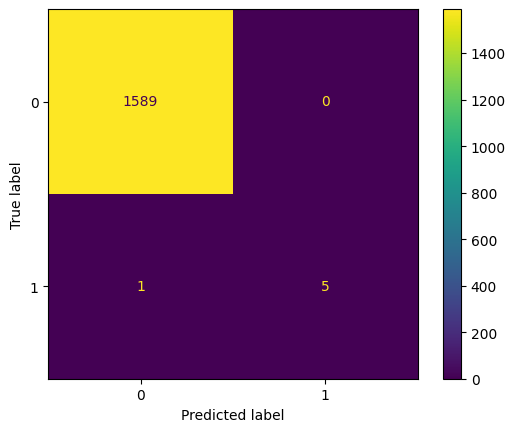

In [71]:
cm=confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [72]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1589
         1.0       1.00      0.83      0.91         6

    accuracy                           1.00      1595
   macro avg       1.00      0.92      0.95      1595
weighted avg       1.00      1.00      1.00      1595



In [73]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [75]:
dt = DecisionTreeClassifier()

dt_score = cross_val_score(dt, X, y, cv=kf).mean()
print("Decision Tree classifier score:", dt_score)

Decision Tree classifier score: 0.9991220210585936


In [76]:
lr = LogisticRegression(max_iter=100)

In [77]:
lr_score = cross_val_score(lr, X, y, cv=kf).mean()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [78]:
print("Logistic Regression classifier score:", lr_score)

Logistic Regression classifier score: 0.9992473342432241


In [79]:
dt_ab = AdaBoostClassifier(estimator=dt, n_estimators=50, random_state=42)
dt_ab_score = cross_val_score(dt_ab, X, y, cv=kf).mean()
print("AdaBoost classifier with Decision Tree base learner score:", dt_ab_score)

AdaBoost classifier with Decision Tree base learner score: 0.999122099723493


In [80]:
lr_ab = AdaBoostClassifier(estimator=lr, n_estimators=50, random_state=42)
lr_ab_score = cross_val_score(lr_ab, X, y, cv=kf).mean()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [81]:
print("AdaBoost classifier with Logistic Regression base learner score:", lr_ab_score)

AdaBoost classifier with Logistic Regression base learner score: 0.9993727260927538
